# Data Story

Questions posed:
- What is the distribution of reviews?
- Is there a connection between review length and review rating?
- Do closed restaurants have worse reviews than open restaurants?
- What words are more common in open/closed restaurants? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
reviews = pickle.load( open( "restaurant_reviews_cleaned.pkl", "rb" ) )

In [3]:
reviews

,stars,text,good_bad,language,is_open,length
0,5,love deagans really atmosphere cozy festive sh...,Good,en,1.0,248
1,1,dismal lukewarm defrostedtasting texmex glop m...,Bad,en,0.0,285
2,4,oh happy day finally canes near casa yes other...,Good,en,1.0,501
3,5,definitely favorite fast food sub shop ingredi...,Good,en,1.0,355
4,5,really good place simple decor amazing food gr...,Good,en,1.0,246
...,...,...,...,...,...,...
5026161,5,confections cash casinos welcome las vegas fin...,Good,en,0.0,1014
5026162,3,solid american food southern comfort flare war...,Neutral,en,1.0,912
5026163,5,im honestly sure never place im definitely goi...,Good,en,1.0,685
5026164,3,food decent say service took way long order ev...,Neutral,en,1.0,214


# What is the distribution of reviews?

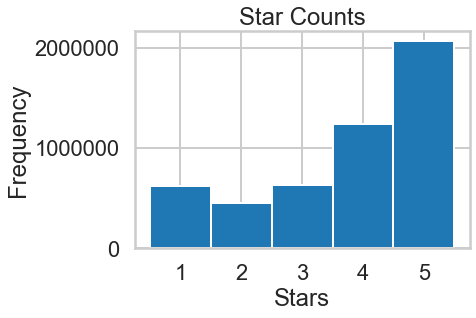

In [4]:
plt.hist(reviews.stars, bins=[.5,1.5,2.5,3.5,4.5,5.5], align='mid')
plt.title('Star Counts')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5])
plt.show()

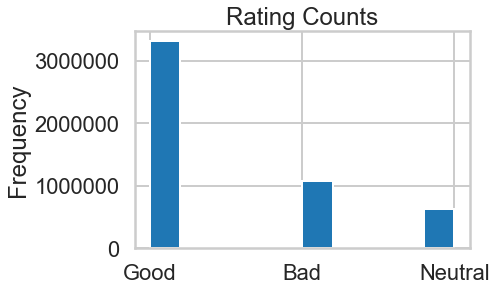

In [5]:
plt.hist(reviews.good_bad)
plt.title('Rating Counts')
plt.ylabel('Frequency')
plt.show()

In [6]:
list(reviews.good_bad.value_counts().keys())

['Good', 'Bad', 'Neutral']

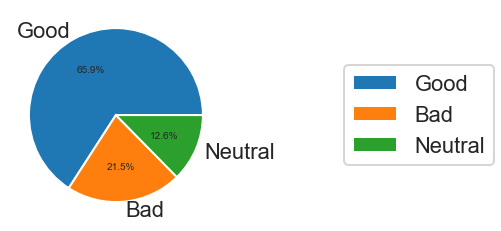

In [7]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)

plt.pie(reviews.good_bad.value_counts(), labels=list(reviews.good_bad.value_counts().keys()), 
        autopct=lambda pct: func(pct, reviews.good_bad.value_counts()))
plt.legend(loc="center left", bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()

# Story - Review Distribution

- It appears that most reviews are generally positive with a roughly 2/3rds of reviews receiving a good rating. 
- The histogram of star distribution is nice but I think the pie chart tells this story best. 

# Is there a connection between review length and review rating?

In [8]:
reviews['length'] = reviews['text'].apply(len)

In [9]:
reviews.head()

,stars,text,good_bad,language,is_open,length
0,5,love deagans really atmosphere cozy festive sh...,Good,en,1.0,248
1,1,dismal lukewarm defrostedtasting texmex glop m...,Bad,en,0.0,285
2,4,oh happy day finally canes near casa yes other...,Good,en,1.0,501
3,5,definitely favorite fast food sub shop ingredi...,Good,en,1.0,355
4,5,really good place simple decor amazing food gr...,Good,en,1.0,246


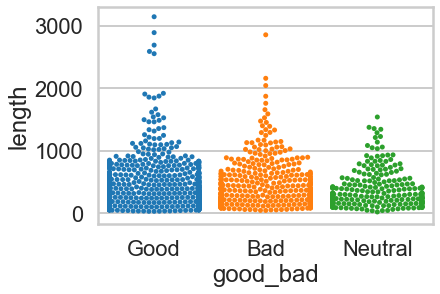

In [10]:
# Draw a categorical scatterplot to show each observation 

# Only showing a random 2000 points as the swarmplot gets too busy
sns.swarmplot(x="good_bad", y="length", data=reviews.sample(n=2000))

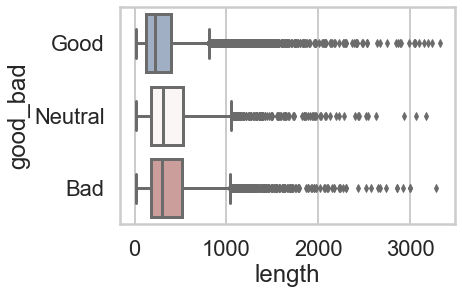

In [11]:
# Boxplot of reviews

# Randomly selecting 20000 points as the boxplot gets busy
sns.boxplot(x="length", y="good_bad", data=reviews.sample(20000), palette="vlag")
plt.show()

In [12]:
length_means = reviews[['stars','length']].groupby('stars').mean()
length_means

,length
stars,
1,392.416310
2,436.123762
3,423.777036
4,379.309253
5,288.110476


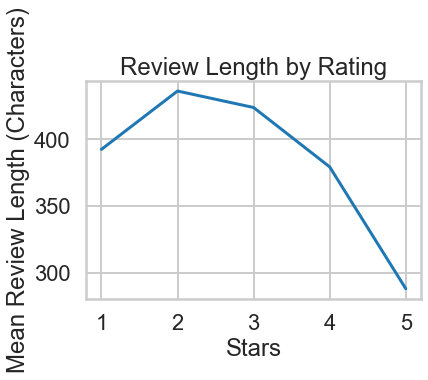

In [13]:
plt.plot(length_means.index, length_means.length)
plt.xlabel('Stars')
plt.ylabel('Mean Review Length (Characters)')
plt.title('Review Length by Rating')
plt.show()

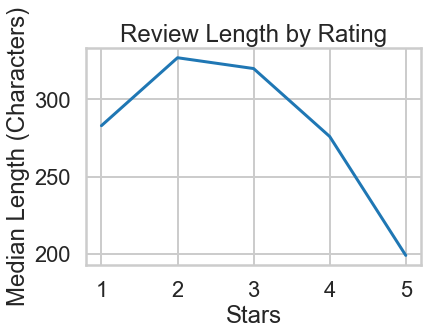

In [14]:
length_medians = reviews[['stars','length']].groupby('stars').median()
plt.plot(length_medians.index, length_medians.length)
plt.xlabel('Stars')
plt.ylabel('Median Length (Characters)')
plt.title('Review Length by Rating')
plt.show()

# Story - Length observations

It does appear that good reviews tend to be shorter. This could be due to the need for people to elaborate/rant if they have a negative experience that they want others to know about. Mean/Median graphs over stars appears to be the best visual.

# Do closed restaurants have worse reviews than open restaurants?

In [15]:
closed_restaurants = reviews[reviews.is_open == 0]
open_restaurants = reviews[reviews.is_open ==1]
closed_bad = closed_restaurants[closed_restaurants.good_bad == 'Bad']
open_bad = open_restaurants[open_restaurants.good_bad == 'Bad']
good_reviews = reviews[reviews.good_bad == 'Good']
bad_reviews = reviews[reviews.good_bad == 'Bad']

In [16]:
open_restaurants

,stars,text,good_bad,language,is_open,length
0,5,love deagans really atmosphere cozy festive sh...,Good,en,1.0,248
2,4,oh happy day finally canes near casa yes other...,Good,en,1.0,501
3,5,definitely favorite fast food sub shop ingredi...,Good,en,1.0,355
4,5,really good place simple decor amazing food gr...,Good,en,1.0,246
5,5,delicious authentic italian ive us leave place...,Good,en,1.0,138
...,...,...,...,...,...,...
5026160,2,looking eating quite time place really nice ol...,Bad,en,1.0,612
5026162,3,solid american food southern comfort flare war...,Neutral,en,1.0,912
5026163,5,im honestly sure never place im definitely goi...,Good,en,1.0,685
5026164,3,food decent say service took way long order ev...,Neutral,en,1.0,214


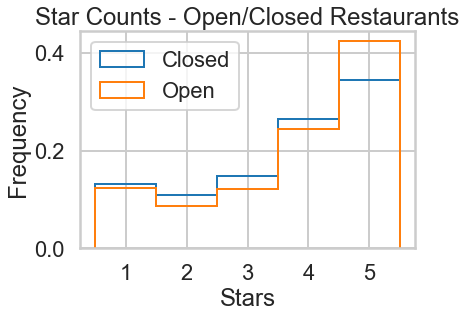

In [17]:
plt.hist(closed_restaurants.stars, bins=[.5,1.5,2.5,3.5,4.5,5.5], align='mid', histtype='step', density=True,
        label='Closed')
plt.hist(open_restaurants.stars, bins=[.5,1.5,2.5,3.5,4.5,5.5], align='mid', histtype='step', density=True,
        label='Open')
plt.title('Star Counts - Open/Closed Restaurants')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5])
plt.legend(loc='upper left')
plt.show()

In [18]:
open_restaurants.stars.mean()

3.7602575455554073

In [19]:
closed_restaurants.stars.mean()

3.579607696438376

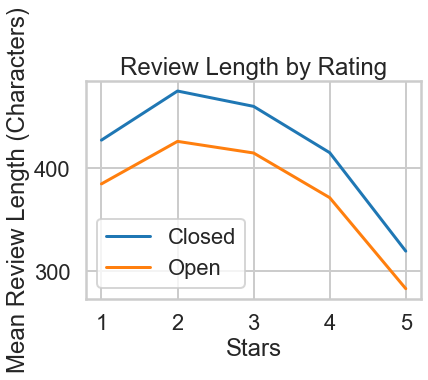

In [20]:
closed_length_means = closed_restaurants[['stars','length']].groupby('stars').mean()
open_length_means = open_restaurants[['stars','length']].groupby('stars').mean()

plt.plot(closed_length_means.index, closed_length_means.length, label = 'Closed')
plt.plot(open_length_means.index, open_length_means.length, label = 'Open')
plt.xlabel('Stars')
plt.ylabel('Mean Review Length (Characters)')
plt.title('Review Length by Rating')
plt.legend()
plt.show()

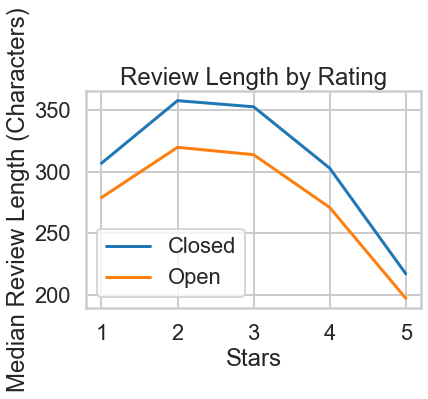

In [21]:
closed_length_median = closed_restaurants[['stars','length']].groupby('stars').median()
open_length_median = open_restaurants[['stars','length']].groupby('stars').median()

plt.plot(closed_length_median.index, closed_length_median.length, label = 'Closed')
plt.plot(open_length_median.index, open_length_median.length, label = 'Open')
plt.xlabel('Stars')
plt.ylabel('Median Review Length (Characters)')
plt.title('Review Length by Rating')
plt.legend()
plt.show()

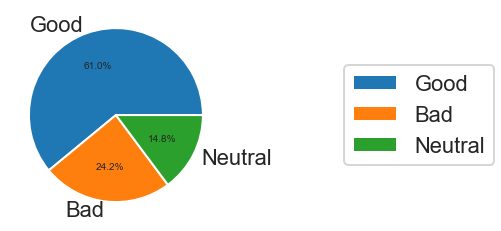

In [22]:
plt.pie(closed_restaurants.good_bad.value_counts(), labels=list(closed_restaurants.good_bad.value_counts().keys()), 
        autopct=lambda pct: func(pct, closed_restaurants.good_bad.value_counts()))
plt.legend(loc="center left", bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()

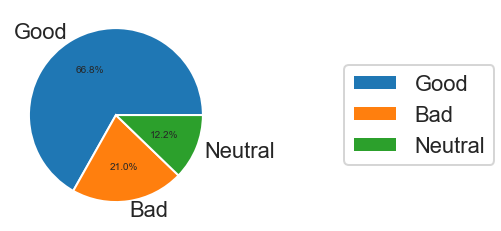

In [23]:
plt.pie(open_restaurants.good_bad.value_counts(), labels=list(open_restaurants.good_bad.value_counts().keys()), 
        autopct=lambda pct: func(pct, open_restaurants.good_bad.value_counts()))
plt.legend(loc="center left", bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()

# Story - Open/Closed Ratings
- Closed restaurants have a very similar distribution to open restaurants.
- There are less 5 star reviews for closed restaurants, as might be expected (5-star restaurants may be less likely to struggle and close). 
- There does appear to be a difference between the ratings of open and closed restaurants. Their distributions are similar and the difference in means is not large. It would take some statistical analysis to determine if this difference is significant.
- The histogram showed this story best.
- There is an interesting length difference noticed in the reviews of open vs. closed restaurants. It would also be interesting to see if there is a statistical significance to this. 

# What words are more common in good/bad reviews? 

In [24]:
# Creating a frequency count of words in the review set. 

In [25]:
def word_counts(review_frame):
    """Takes a pandas series of reviews and returns the count of all words in the collection in a sorted dictionary """
    """input needs to have a column named text"""
    
    parsed = review_frame.text.str.split()
    
    counts = {}

    for reviews in parsed:
        # For each row in the dataframe
        
        for word in reviews:
        # For each word in list
            
            if word in counts.keys():
                counts[word] += 1
            else:
                counts[word] = 1
                
    ordered_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    
    return ordered_counts

In [26]:
good_counts = word_counts(good_reviews)

In [27]:
bad_counts = word_counts(bad_reviews)

In [28]:
top_20_good_words = dict(good_counts[0:20])
top_20_good_words

{'food': 2234578,
 'good': 1968677,
 'great': 1894597,
 'place': 1832646,
 'service': 1203606,
 'like': 956555,
 'time': 915319,
 'one': 885603,
 'back': 877245,
 'really': 834607,
 'delicious': 815058,
 'get': 799056,
 'go': 769385,
 'also': 767101,
 'best': 752519,
 'would': 682069,
 'love': 678927,
 'chicken': 662351,
 'restaurant': 653769,
 'nice': 638649}

In [29]:
top_20_bad_words = dict(bad_counts[0:20])
top_20_bad_words

{'food': 990183,
 'place': 572291,
 'service': 517146,
 'like': 501040,
 'good': 481811,
 'one': 452907,
 'us': 437928,
 'time': 435603,
 'get': 426474,
 'back': 424728,
 'order': 417679,
 'would': 415074,
 'ordered': 385154,
 'go': 338157,
 'even': 326495,
 'got': 307928,
 'came': 306513,
 'restaurant': 286843,
 'never': 282454,
 'minutes': 273967}

In [30]:
freq_dict = {}

for word in top_20_good_words.keys():
    if word in freq_dict.keys():
        freq_dict[word][0] = dict(good_counts)[word]
    else:
        freq_dict[word] = [dict(good_counts)[word],0]
        freq_dict[word][1] = dict(bad_counts)[word]
for word in top_20_bad_words.keys():
    freq_dict[word] = [0 ,dict(bad_counts)[word]]
    freq_dict[word][0] = dict(good_counts)[word]


In [31]:
good_list_counts = []
bad_list_counts = []
for word in freq_dict.keys():
    good_list_counts.append(freq_dict[word][0])
    bad_list_counts.append(freq_dict[word][1])

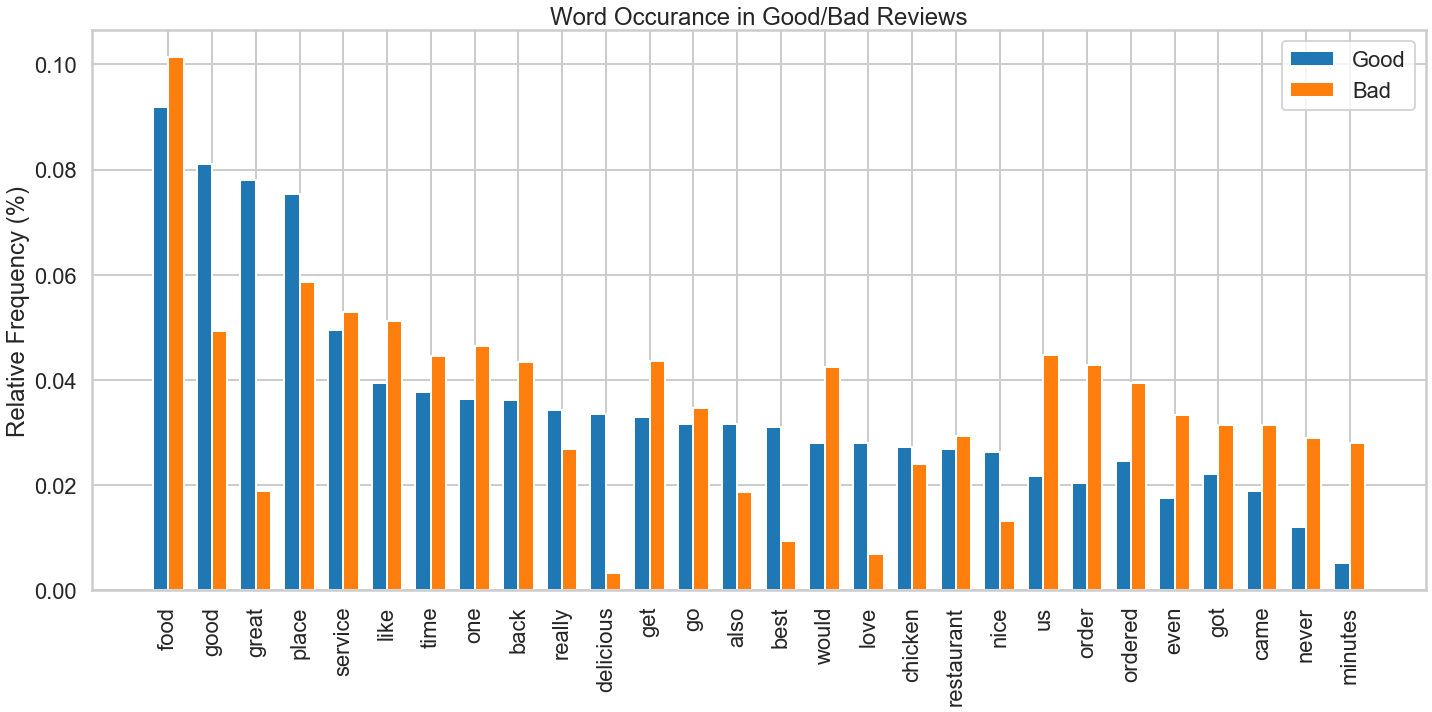

In [32]:

labels = list(freq_dict.keys())

x = np.arange(28)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, np.array(good_list_counts)/sum(good_list_counts), width, label='Good')
rects2 = ax.bar(x + width/2, np.array(bad_list_counts)/sum(bad_list_counts), width, label='Bad')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative Frequency (%)')
ax.set_title('Word Occurance in Good/Bad Reviews')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()

# Story - Word Frequency

Words like 'great' and 'good' unsurprisingly have large deltas in usage favoring good reviews. Even larger differences in 'delicious' and 'love' as they are typically stronger words of the same sentiment. 

Words more frequently used in bad reviews are very centric around words specific to issues with their orders. 'Order/Ordered', 'got', 'came', never', 'minutes' are all words that suggest these patrons had more of a problem with the service and timing than the food itself. 

In [33]:
# Saved off cleaned data set
reviews.to_pickle('restaurant_reviews_cleaned.pkl')

In [34]:
from wordcloud import WordCloud

In [35]:
good_words = dict(good_counts[0:100])
bad_words = dict(bad_counts[0:100])

In [36]:
# Create the wordcloud object
goodcloud = WordCloud(width=2048, height=2048, margin=0, background_color="white").generate_from_frequencies(good_words)

badcloud = WordCloud(width=2048, height=2048, margin=0, background_color="white").generate_from_frequencies(bad_words)

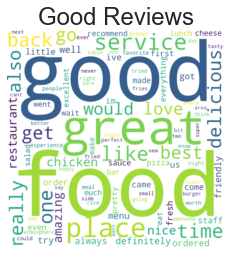

In [37]:
# Display the generated image:
plt.imshow(goodcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Good Reviews')
plt.show()


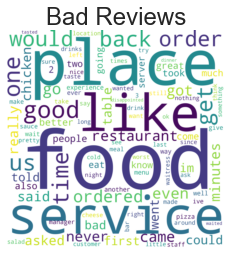

In [38]:
# Display the generated image:
plt.imshow(badcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Bad Reviews')
plt.show()